In [41]:
from platform import python_version
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pkg_resources
import sklearn
import pickle
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [5]:
idf = pd.read_csv("./InsulinData.csv")
cdf = pd.read_csv("./CGMData.csv")

C:\Users\15713\AppData\Local\Temp\ipykernel_10680\1557392717.py:1: DtypeWarning: Columns (13,43) have mixed types. Specify dtype option on import or set low_memory=False.
  idf = pd.read_csv("./InsulinData.csv")
C:\Users\15713\AppData\Local\Temp\ipykernel_10680\1557392717.py:2: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  cdf = pd.read_csv("./CGMData.csv")


In [10]:
#print(idf.info())
#print(cdf.info())

In [23]:
#print(len(list(idf[idf['BWZ Carb Input (grams)'].notna() & idf['BWZ Carb Input (grams)'] != 0.0]['Time'][::-1]))) #747 values
#print(idf[idf['BWZ Carb Input (grams)'].notna() & idf['BWZ Carb Input (grams)'] != 0.0].index[::-1].values)  #747 values

747


In [29]:
myTime= idf.iloc[1][['Date', 'Time']].values
myTime= pd.to_datetime(myTime[0] + " "+ myTime[1])
print (myTime)

2018-02-12 13:20:48


In [22]:
allMeals= list(idf[idf['BWZ Carb Input (grams)'].notna() & idf['BWZ Carb Input (grams)'] != 0.0]['Time'][::-1])
allIndexes= idf[idf['BWZ Carb Input (grams)'].notna() & idf['BWZ Carb Input (grams)'] != 0.0].index[::-1].values
myFilter= []
for i in range(0, len(allIndexes)):
    num= allIndexes[i]
    addNum= True
    dTime= idf.iloc[num][['Date', 'Time']].values
    dTime= pd.to_datetime(dTime[0] + " "+ dTime[1])
    while True:
        num-= 1
        row= idf['BWZ Carb Input (grams)'].iloc[num]
        rdTime= idf[['Date', 'Time']].iloc[num].values
        rdTime= pd.to_datetime(rdTime[0] + " "+ rdTime[1])
        if rdTime > (dTime + pd.Timedelta(2, "h")) or num < 0:
            break
        if not np.isnan(row):
            addNum= False
            break
    if addNum:
        myFilter.append(allIndexes[i])

print(len(myFilter)) #prints a 559 x 30 valued Matrix

559


In [30]:
print(len(allIndexes))

747


In [31]:
notMeals= []
myNums= myFilter[0]
while True:
    addList= True
    ign= True
    if myNums < 0:
        break
    dTime= idf.iloc[myNums][['Date', 'Time']].values
    dTime= pd.to_datetime(dTime[0] + " "+ dTime[1])
    while ign:
        myNums-= 1
        row= idf['BWZ Carb Input (grams)'].iloc[myNums]
        rdTime= idf[['Date', 'Time']].iloc[myNums].values
        rdTime= pd.to_datetime(rdTime[0] + " "+ rdTime[1])
        if rdTime > (dTime + pd.Timedelta(2, "h")) or myNums < 0:
            ign = False
            break
        if not np.isnan(row):
            dTime= idf.iloc[myNums][['Date', 'Time']].values
            dTime= pd.to_datetime(dTime[0] + " "+ dTime[1])
    myNumsOg= myNums
    dTime= idf.iloc[myNums][['Date', 'Time']].values
    dTime= pd.to_datetime(dTime[0] + " "+ dTime[1])
    while True:
        row = idf['BWZ Carb Input (grams)'].iloc[myNums]
        rdTime= idf[['Date', 'Time']].iloc[myNums].values
        rdTime= pd.to_datetime(rdTime[0] + " "+ rdTime[1])
        if rdTime > (dTime + pd.Timedelta(2, "h")) or myNums < 0:
            break
        if not np.isnan(row):
            addList = False
            break
        myNums-= 1
    if addList:
        notMeals.append(myNumsOg)        
    
print(len(notMeals)) #prints a len of 622

622


In [34]:
meals2= []
c= 0
for i in filtered:
    dTime= idf[['Date','Time']].iloc[i].values
    dTime= dTime[0] + " "+ dTime[1]
    dTime= pd.to_datetime(dTime)

    dateVal= cdf[(pd.to_datetime(cdf['Date']).dt.date == dTime.date())][["Date", "Time", "Sensor Glucose (mg/dL)"]]

    less= dateVal[(pd.to_datetime(dateVal['Time']).dt.time >= dTime.time())]
    more= dateVal[(pd.to_datetime(dateVal['Time']).dt.time <= (dTime + pd.Timedelta(5, "m")).time())]
    if len(less) > 0 and len(more) > 0:
        l = less.iloc[-1]
        u = more.iloc[0]
        if u.name == l.name:
            i= u.name
            meals2.append(list(cdf.iloc[i-20:i+4]['Sensor Glucose (mg/dL)'][::-1]))
print(len(meals2)) #prints a length of 522

C:\Users\15713\AppData\Local\Temp\ipykernel_10680\4003421465.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  less= dateVal[(pd.to_datetime(dateVal['Time']).dt.time >= dTime.time())]
C:\Users\15713\AppData\Local\Temp\ipykernel_10680\4003421465.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  more= dateVal[(pd.to_datetime(dateVal['Time']).dt.time <= (dTime + pd.Timedelta(5, "m")).time())]
C:\Users\15713\AppData\Local\Temp\ipykernel_10680\4003421465.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  less= dateVal[(pd.to_datetime(dateVal['Time']).dt.time >= dTime.tim

553


C:\Users\15713\AppData\Local\Temp\ipykernel_10680\4003421465.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  more= dateVal[(pd.to_datetime(dateVal['Time']).dt.time <= (dTime + pd.Timedelta(5, "m")).time())]
C:\Users\15713\AppData\Local\Temp\ipykernel_10680\4003421465.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  less= dateVal[(pd.to_datetime(dateVal['Time']).dt.time >= dTime.time())]
C:\Users\15713\AppData\Local\Temp\ipykernel_10680\4003421465.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  more= dateVal[(pd.to_datetime(dateVal['Time']).dt.time <= (dTime + 

In [37]:
notMeals2= []
for i in notMeals:
    dTime= idf[['Date','Time']].iloc[i].values
    dTime= dTime[0] + " "+ dTime[1]
    dTime= pd.to_datetime(dTime)
    
    dateVal= cdf[(pd.to_datetime(cdf['Date']).dt.date == dTime.date())][["Date", "Time", "Sensor Glucose (mg/dL)"]]

    less= dateVal[(pd.to_datetime(dateVal['Time']).dt.time >= dTime.time())]
    more= dateVal[(pd.to_datetime(dateVal['Time']).dt.time <= (dTime + pd.Timedelta(5, "m")).time())]
    if len(less) > 0 and len(more) > 0:
        l= less.iloc[-1]
        u= more.iloc[0]
        if u.name == l.name:
            i= u.name
            notMeals2.append(list(cdf.iloc[i-23:i+1]['Sensor Glucose (mg/dL)'][::-1]))

print(len(notMeals2))  #prints 612

C:\Users\15713\AppData\Local\Temp\ipykernel_10680\1559823654.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  less= dateVal[(pd.to_datetime(dateVal['Time']).dt.time >= dTime.time())]
C:\Users\15713\AppData\Local\Temp\ipykernel_10680\1559823654.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  more= dateVal[(pd.to_datetime(dateVal['Time']).dt.time <= (dTime + pd.Timedelta(5, "m")).time())]
C:\Users\15713\AppData\Local\Temp\ipykernel_10680\1559823654.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  less= dateVal[(pd.to_datetime(dateVal['Time']).dt.time >= dTime.time(

612


C:\Users\15713\AppData\Local\Temp\ipykernel_10680\1559823654.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  less= dateVal[(pd.to_datetime(dateVal['Time']).dt.time >= dTime.time())]
C:\Users\15713\AppData\Local\Temp\ipykernel_10680\1559823654.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  more= dateVal[(pd.to_datetime(dateVal['Time']).dt.time <= (dTime + pd.Timedelta(5, "m")).time())]
C:\Users\15713\AppData\Local\Temp\ipykernel_10680\1559823654.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  less= dateVal[(pd.to_datetime(dateVal['Time']).dt.time >= dTime.time(

In [38]:
print(len(notMeals2))  #prints 612

612


In [39]:
print(meals2[0])
print(len(meals2[0]))

[71.0, 81.0, 102.0, 131.0, 140.0, 147.0, 153.0, 159.0, 163.0, 159.0, 153.0, 151.0, 155.0, 163.0, 164.0, nan, 166.0, 168.0, 164.0, 169.0, 178.0, 184.0, 190.0, 195.0]
24


In [40]:
print(notMeals2[0])
print(len(notMeals2[0]))

[73.0, 70.0, 65.0, 62.0, 59.0, 58.0, 63.0, 71.0, 81.0, 86.0, 81.0, 75.0, 71.0, 64.0, 57.0, 50.0, 45.0, 44.0, 43.0, 45.0, 46.0, 47.0, 48.0, 51.0]
24


In [51]:
X= meals2

sImp= SimpleImputer(missing_values=np.nan, strategy='mean')
newModel= sImp.fit_transform(X)
print(newModel)

[[ 71.  81. 102. ... 184. 190. 195.]
 [268. 259. 255. ... 267. 267. 274.]
 [ 40.  60.  71. ...  72.  70.  67.]
 ...
 [104. 123. 132. ... 162. 189. 201.]
 [ 60.  51.  52. ...  80.  84.  86.]
 [151. 154. 153. ... 184. 178. 180.]]


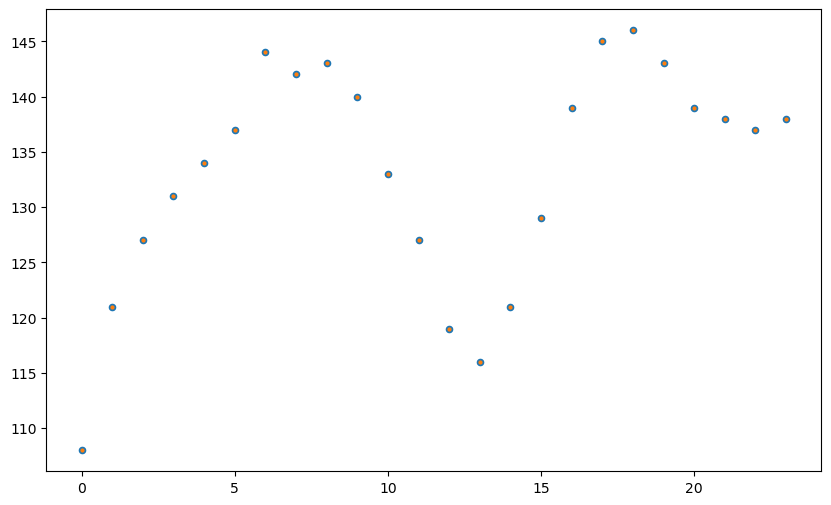

In [53]:
x= np.arange(0, 24)
plt.figure(figsize=(10,6))
plt.scatter(x, meals2[470], s=20)
plt.scatter(x, newModel[470], s=4)
plt.show()

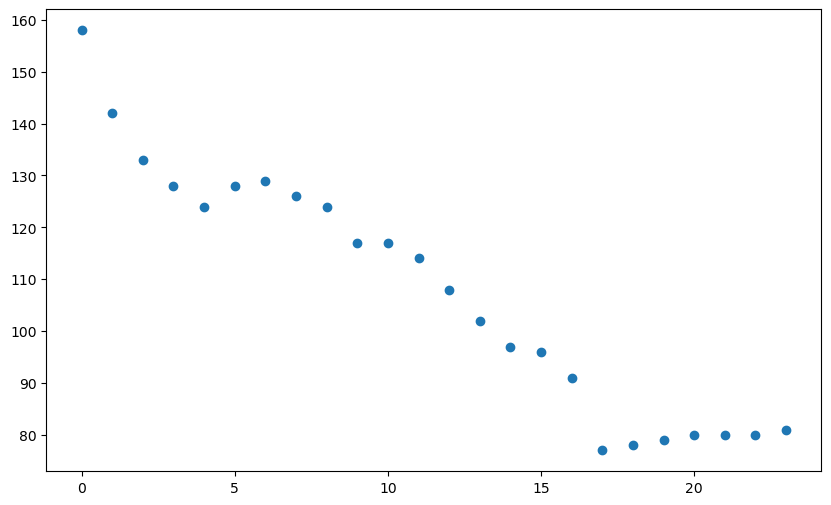

In [49]:
x= np.arange(0, 24)
plt.figure(figsize=(10,6))
plt.scatter(x, notMeals2[122])
plt.show()

In [54]:
rem= []
c= 0
for i in range(0,len(meals2)):
    if np.isnan(meals2[i]).any():
        if np.count_nonzero(np.isnan(meals2[i])) > 10:
            pass
        rem.append(i)
        c+= 1
print(f"{c} dirty")
print(f"{len(rem)} to remove")
print(len(meals2))
print(rem)

115 dirty
115 to remove
553
[0, 12, 13, 14, 15, 31, 32, 33, 41, 46, 47, 64, 74, 78, 79, 81, 82, 97, 98, 100, 112, 118, 119, 140, 157, 176, 177, 188, 190, 192, 205, 206, 207, 208, 210, 211, 214, 226, 228, 229, 235, 239, 247, 252, 253, 254, 256, 258, 259, 260, 261, 279, 284, 285, 286, 290, 291, 298, 300, 318, 322, 323, 324, 325, 329, 335, 337, 338, 339, 341, 342, 343, 344, 364, 365, 366, 367, 368, 369, 370, 385, 386, 392, 393, 394, 395, 397, 399, 409, 411, 427, 428, 429, 441, 443, 444, 445, 446, 447, 451, 457, 469, 472, 473, 474, 489, 507, 508, 515, 524, 529, 533, 539, 542, 545]


In [55]:
for i in rem[::-1]:
    meals2.pop(i)
print(len(meals2))

438


In [56]:
rem2= []
c2= 0
for i in range(0,len(notMeals2)):
    if np.isnan(notMeals2[i]).any():
        if np.count_nonzero(np.isnan(notMeals2[i])) > 10:
            rem2.append(i)
        c2 += 1
print(f"{c2} dirty")
print(f"{len(rem2)} to remove")
print(len(notMeals2))

88 dirty
32 to remove
612


In [57]:
for i in rem2[::-1]:
    notMeals2.pop(i)
print(len(notMeals2))

580


In [ ]:
cm= create_matricies()
m, n = cm.start()

In [ ]:
print(m)
print(len(m))
m_labels = np.ones((len(m),1))
print(n)
print(len(n))
n_labels = np.zeros((len(n),1))

In [58]:
class createMatrix:
    def __init__(self):
        self.cgm1 = pd.read_csv("./CGMData.csv")
        self.insulin1 = pd.read_csv("./InsulinData.csv")
        self.cgm2 = pd.read_csv("./CGM_patient2.csv")
        self.insulin2 = pd.read_csv("./Insulin_patient2.csv")

    #Get all meal indicies
    def iScrape(self, idf):
        allIndexes= idf[idf['BWZ Carb Input (grams)'].notna() & idf['BWZ Carb Input (grams)'] != 0.0].index[::-1].values
        myFilter= []
        for i in range(0, len(allIndexes)):
            index= allIndexes[i]
            addI= True
            dt= idf.iloc[index][['Date', 'Time']].values
            dt= pd.to_datetime(dt[0] + " "+ dt[1])
            while True:
                index-= 1
                row= idf['BWZ Carb Input (grams)'].iloc[index]
                rdt= idf[['Date', 'Time']].iloc[index].values
                rdt= pd.to_datetime(rdt[0] + " "+ rdt[1])
                if rdt > (dt + pd.Timedelta(2, "h")) or index < 0:
                    break
                if not np.isnan(row):
                    addI = False
                    break
            if addI:
                myFilter.append(allIndexes[i])
        return myFilter

    #Get all not meal indicies
    def iNotMeals(self, idf):
        myFilter= self.iScrape(idf)
        notMeals= []
        index= myFilter[0]
        while True:
            addL= True
            ign= True
            if index < 0:
                break
            dt= idf.iloc[index][['Date', 'Time']].values
            dt= pd.to_datetime(dt[0] + " "+ dt[1])
            #meal data
            while ign:
                index-= 1
                row= idf['BWZ Carb Input (grams)'].iloc[index]
                rdt= idf[['Date', 'Time']].iloc[index].values
                rdt= pd.to_datetime(rdt[0] + " "+ rdt[1])
                if rdt > (dt + pd.Timedelta(2, "h")) or index < 0:
                    ign= False
                    break
                if not np.isnan(row):
                    dt= idf.iloc[index][['Date', 'Time']].values
                    dt= pd.to_datetime(dt[0] + " "+ dt[1])
            indexOg= index
            dt= idf.iloc[index][['Date', 'Time']].values
            dt= pd.to_datetime(dt[0] + " "+ dt[1])
            #Not meal data
            while True:
                row= idf['BWZ Carb Input (grams)'].iloc[index]
                rdt= idf[['Date', 'Time']].iloc[index].values
                rdt= pd.to_datetime(rdt[0] + " "+ rdt[1])
                if rdt > (dt + pd.Timedelta(2, "h")) or index < 0:
                    break
                if not np.isnan(row):
                    addL = False
                    break
                index-= 1
            if addL:
                notMeals.append(indexOg)  
        return notMeals

    #Create Matrix
    def createMatrix(self, idf, cdf, meal):
        matrix= []
        if meal:
            myFilter= self.iScrape(idf)
        else:
            myFilter= self.iNotMeals(idf)
        for i in myFilter:
            dt= idf[['Date','Time']].iloc[i].values
            dt= dt[0] + " "+ dt[1]
            dt= pd.to_datetime(dt)
            date_data = cdf[(pd.to_datetime(cdf['Date']).dt.date == dt.date())][["Date", "Time", "Sensor Glucose (mg/dL)"]]
            less= date_data[(pd.to_datetime(date_data['Time']).dt.time >= dt.time())]
            more= date_data[(pd.to_datetime(date_data['Time']).dt.time <= (dt + pd.Timedelta(5, "m")).time())]
            if len(less) > 0 and len(more) > 0:
                l= less.iloc[-1]
                u= more.iloc[0]
                if u.name == l.name:
                    ind= u.name
                    if meal:
                        matrix.append(list(cdf.iloc[ind-20:ind+4]['Sensor Glucose (mg/dL)'][::-1]))
                    else:
                        matrix.append(list(cdf.iloc[ind-23:ind+1]['Sensor Glucose (mg/dL)'][::-1]))
        return matrix

                        
    #Clean data
    def cleaning(self, matrix, meal):
        rem3= []
        for i in range(0,len(matrix)):
            if np.isnan(matrix[i]).any():
                rem3.append(i)
        for i in rem3[::-1]:
            matrix.pop(i)  
        return matrix
    
    #Combine Matricies
    def combining(self, m1, m2):
#         for row in m2:
#             m1.append(row)
        return np.concatenate((m1,m2))
    
    #Do everything
    def start(self):
        print("Making Matricies")
        p1mealYes= self.createMatrix(self.insulin1, self.cgm1, meal=True)
        p1notMeal= self.createMatrix(self.insulin1, self.cgm1, meal=False)
        print("Patient 1 Done")
        p2mealYes= self.createMatrix(self.insulin2, self.cgm2, meal=True)
        p2notMeal= self.createMatrix(self.insulin2, self.cgm2, meal=False)
        print("Patient 2 Done")
        print("Merging and Cleaning")
        mealMatrix= self.combining(self.cleaning(p1mealYes, meal=True), self.cleaning(p2mealYes, meal=True))
        notMeal_matrix= self.combining(self.cleaning(p1notMeal, meal=False), self.cleaning(p2notMeal, meal=False))
        print("Complete")
        return mealMatrix, notMeal_matrix


In [59]:
cm= createMatrix()
m, n= cm.start()

C:\Users\15713\AppData\Local\Temp\ipykernel_10680\3326941949.py:3: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  self.cgm1 = pd.read_csv("./CGMData.csv")
C:\Users\15713\AppData\Local\Temp\ipykernel_10680\3326941949.py:4: DtypeWarning: Columns (13,43) have mixed types. Specify dtype option on import or set low_memory=False.
  self.insulin1 = pd.read_csv("./InsulinData.csv")
C:\Users\15713\AppData\Local\Temp\ipykernel_10680\3326941949.py:6: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  self.insulin2 = pd.read_csv("./Insulin_patient2.csv")


Making Matricies


C:\Users\15713\AppData\Local\Temp\ipykernel_10680\3326941949.py:85: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  less= date_data[(pd.to_datetime(date_data['Time']).dt.time >= dt.time())]
C:\Users\15713\AppData\Local\Temp\ipykernel_10680\3326941949.py:86: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  more= date_data[(pd.to_datetime(date_data['Time']).dt.time <= (dt + pd.Timedelta(5, "m")).time())]
C:\Users\15713\AppData\Local\Temp\ipykernel_10680\3326941949.py:85: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  less= date_data[(pd.to_datetime(date_data['Time']).dt.time >= dt.

Patient 1 Done


C:\Users\15713\AppData\Local\Temp\ipykernel_10680\3326941949.py:85: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  less= date_data[(pd.to_datetime(date_data['Time']).dt.time >= dt.time())]
C:\Users\15713\AppData\Local\Temp\ipykernel_10680\3326941949.py:86: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  more= date_data[(pd.to_datetime(date_data['Time']).dt.time <= (dt + pd.Timedelta(5, "m")).time())]
C:\Users\15713\AppData\Local\Temp\ipykernel_10680\3326941949.py:85: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  less= date_data[(pd.to_datetime(date_data['Time']).dt.time >= dt.

Patient 2 Done
Merging and Cleaning
Complete


C:\Users\15713\AppData\Local\Temp\ipykernel_10680\3326941949.py:85: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  less= date_data[(pd.to_datetime(date_data['Time']).dt.time >= dt.time())]
C:\Users\15713\AppData\Local\Temp\ipykernel_10680\3326941949.py:86: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  more= date_data[(pd.to_datetime(date_data['Time']).dt.time <= (dt + pd.Timedelta(5, "m")).time())]
C:\Users\15713\AppData\Local\Temp\ipykernel_10680\3326941949.py:85: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  less= date_data[(pd.to_datetime(date_data['Time']).dt.time >= dt.

In [61]:
print(m)

[[268. 259. 255. ... 267. 267. 274.]
 [ 40.  60.  71. ...  72.  70.  67.]
 [200. 199. 201. ... 213. 210. 210.]
 ...
 [153. 152. 150. ... 147. 147. 153.]
 [207. 210. 216. ... 129. 130. 132.]
 [147. 146. 147. ... 133. 139. 165.]]


In [62]:
mLabels= np.ones((len(m),1))
nLabels= np.zeros((len(n),1))

In [63]:
class featureExtract:
    def __init__(self, df):
        self.df = df
    
    def feature1(self, val):
        minim= min(val[0:7])
        maxim= max(val[7:])
        return np.where(val == maxim)[0][0] - np.where(val == minim)[0][0]

    def feature2(self, val):
        minim = min(val[0:7])
        maxim = max(val[7:])
        return (maxim - minim) / minim
    
    def feature3(self, val):
        top= self.feature2(val)
        bottom= self.feature1(val)
        if bottom == 0:
            bottom= 1
        return top / bottom
    
    def extract(self):
        m= np.ndarray(shape=(0,3), dtype=np.intc)
        for r in self.df:
            m = np.vstack([m, np.array([self.feature1(r), self.feature2(r), self.feature3(r)])])
        return m

In [64]:
mf= featureExtract(m)
mealFeatures= mf.extract()
print(mealFeatures)

[[ 1.20000000e+01  2.59090909e-01  2.15909091e-02]
 [ 1.00000000e+01  2.30000000e+00  2.30000000e-01]
 [ 1.40000000e+01  1.80327869e-01  1.28805621e-02]
 ...
 [-6.00000000e+00  1.59090909e-01 -2.65151515e-02]
 [ 7.00000000e+00  2.70531401e-01  3.86473430e-02]
 [ 5.00000000e+00  1.30136986e-01  2.60273973e-02]]


In [65]:
nf= featureExtract(n)
notMealFeatures= nf.extract()
print(notMealFeatures)

[[ 4.00000000e+00  4.82758621e-01  1.20689655e-01]
 [ 1.00000000e+00 -7.60869565e-02 -7.60869565e-02]
 [ 1.70000000e+01  4.59770115e-01  2.70453009e-02]
 ...
 [ 2.10000000e+01  8.45454545e-01  4.02597403e-02]
 [ 1.20000000e+01  6.07142857e-02  5.05952381e-03]
 [ 1.90000000e+01  1.01075269e+00  5.31975099e-02]]


In [66]:
mealFeaturesLabels= np.concatenate((mealFeatures, mLabels), axis=1)
print(mealFeaturesLabels)

[[ 1.20000000e+01  2.59090909e-01  2.15909091e-02  1.00000000e+00]
 [ 1.00000000e+01  2.30000000e+00  2.30000000e-01  1.00000000e+00]
 [ 1.40000000e+01  1.80327869e-01  1.28805621e-02  1.00000000e+00]
 ...
 [-6.00000000e+00  1.59090909e-01 -2.65151515e-02  1.00000000e+00]
 [ 7.00000000e+00  2.70531401e-01  3.86473430e-02  1.00000000e+00]
 [ 5.00000000e+00  1.30136986e-01  2.60273973e-02  1.00000000e+00]]


In [68]:
notMealFeaturesLabels= np.concatenate((notMealFeatures, nLabels), axis=1)
print(notMealFeaturesLabels)

[[ 4.00000000e+00  4.82758621e-01  1.20689655e-01  0.00000000e+00]
 [ 1.00000000e+00 -7.60869565e-02 -7.60869565e-02  0.00000000e+00]
 [ 1.70000000e+01  4.59770115e-01  2.70453009e-02  0.00000000e+00]
 ...
 [ 2.10000000e+01  8.45454545e-01  4.02597403e-02  0.00000000e+00]
 [ 1.20000000e+01  6.07142857e-02  5.05952381e-03  0.00000000e+00]
 [ 1.90000000e+01  1.01075269e+00  5.31975099e-02  0.00000000e+00]]


In [69]:
dataMatrix= np.concatenate((mealFeaturesLabels, notMealFeaturesLabels))
print(dataMatrix)

[[1.20000000e+01 2.59090909e-01 2.15909091e-02 1.00000000e+00]
 [1.00000000e+01 2.30000000e+00 2.30000000e-01 1.00000000e+00]
 [1.40000000e+01 1.80327869e-01 1.28805621e-02 1.00000000e+00]
 ...
 [2.10000000e+01 8.45454545e-01 4.02597403e-02 0.00000000e+00]
 [1.20000000e+01 6.07142857e-02 5.05952381e-03 0.00000000e+00]
 [1.90000000e+01 1.01075269e+00 5.31975099e-02 0.00000000e+00]]


In [70]:
dfa= pd.DataFrame(data=dataMatrix, columns=['f1', 'f2', 'f3', 'meal'])
print(dfa)

        f1        f2        f3  meal
0     12.0  0.259091  0.021591   1.0
1     10.0  2.300000  0.230000   1.0
2     14.0  0.180328  0.012881   1.0
3     11.0  0.745902  0.067809   1.0
4     23.0  2.452830  0.106645   1.0
...    ...       ...       ...   ...
1531  12.0  0.120000  0.010000   0.0
1532  16.0  0.119718  0.007482   0.0
1533  21.0  0.845455  0.040260   0.0
1534  12.0  0.060714  0.005060   0.0
1535  19.0  1.010753  0.053198   0.0

[1536 rows x 4 columns]


In [71]:
np.random.seed(42)

In [73]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dfa, test_size=0.2, random_state=42)

In [74]:
xTrain = train_set[['f1', 'f2', 'f3']].copy()
yTrain = train_set['meal'].copy()
xTest = test_set[['f1', 'f2', 'f3']].copy()
yTest = test_set['meal'].copy()

In [75]:
print(xTest)

        f1        f2        f3
1159  18.0  0.122222  0.006790
76     1.0 -0.031142 -0.031142
316    6.0  0.522523  0.087087
1040  19.0  1.013158  0.053324
1357   1.0 -0.040936 -0.040936
...    ...       ...       ...
846    8.0  0.020833  0.002604
1518  12.0  0.185930  0.015494
233    7.0  1.153846  0.164835
976    7.0  1.232558  0.176080
196   13.0  1.340000  0.103077

[308 rows x 3 columns]


In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [78]:
f= 6
clfd= DecisionTreeClassifier(random_state=42)
print(f"DT(gini): {max(cross_val_score(clfd, xTrain, yTrain, cv=f, scoring='accuracy'))}")
clfe= DecisionTreeClassifier(criterion="entropy", random_state=42)
print(f"DT(entropy): {max(cross_val_score(clfe, xTrain, yTrain, cv=f, scoring='accuracy'))}")
svmClf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
print(f"SVM: {max(cross_val_score(svmClf, xTrain, yTrain, cv=f, scoring='accuracy'))}")
mlpClf = MLPClassifier(random_state=42, max_iter=300)
print(f"MLP: {max(cross_val_score(mlpClf, xTrain, yTrain, cv=f, scoring='accuracy'))}")

DT(gini): 0.6470588235294118
DT(entropy): 0.6634146341463415
SVM: 0.7317073170731707
MLP: 0.7121951219512195


In [79]:
from sklearn.model_selection import cross_val_score
cross_val_score(svmClf, xTrain, yTrain, cv=f, scoring="accuracy")

array([0.73170732, 0.65365854, 0.68780488, 0.65853659, 0.67647059,
       0.67647059])

In [80]:
from sklearn.model_selection import cross_val_predict
yTrainPredict= cross_val_predict(svmClf, xTrain, yTrain, cv=f)

In [81]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(yTrain, yTrainPredict))
print(recall_score(yTrain, yTrainPredict))

0.7093821510297483
0.5391304347826087


In [82]:
from sklearn.metrics import f1_score
f1_score(yTrain, yTrainPredict)

0.6126482213438734

In [89]:
from sklearn.metrics import precision_recall_curve
yScores= cross_val_predict(svmClf, xTrain, yTrain, cv=6, method="decision_function")
precisionVal, recallVal, thresholdVal= precision_recall_curve(yTrain, yScores)

In [90]:
from sklearn.metrics import roc_curve
fp, tp, threshol= roc_curve(yTrain, yScores)

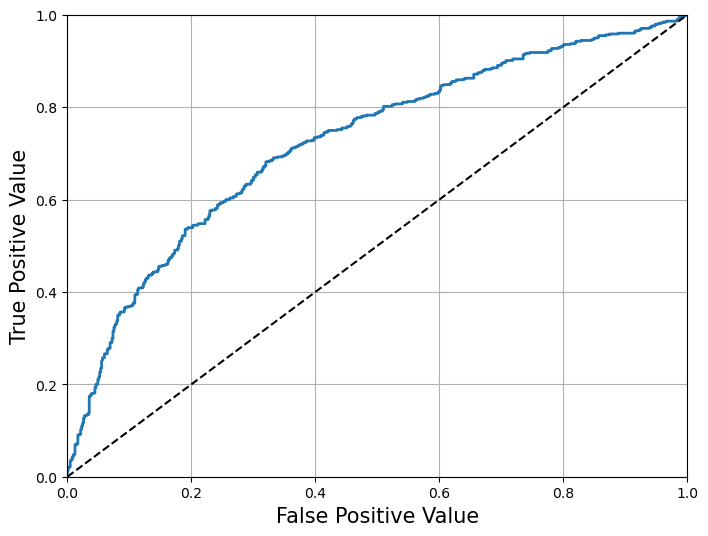

In [92]:
def rocCurve(fp, tp, label=None):
    plt.plot(fp, tp, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Value', fontsize=15) 
    plt.ylabel('True Positive Value', fontsize=15)    
    plt.grid(True)                                           
plt.figure(figsize=(8, 6))
plot_roc_curve(fp, tp)
plt.show()

In [93]:
svmClf.fit(xTrain, yTrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
yTestPredict= svmClf.predict(xTest)
print(yTestPredict)

[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.]


In [96]:
accuracy_score(yTest, yTestPredict)

0.6753246753246753

In [97]:
file= 'finalModel.sav'
pickle.dump(svmClf, open(file, 'wb'))